In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from os import listdir,mkdir
from os.path import isfile, join,exists
import json

In [ ]:
final_folders2=['armraise','bicyclecrunch','birddog','curl','fly','legraise','overheadpress','pushup','squat','superman']
labels=['armraise','bicyclecrunch','birddog','curl','fly','legrais','overheadpress','pushup','squat','superman']
angle_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/angle'
positions_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/positions'
output_array_intialization=[0,0,0,0,0,0,0,0,0,0]
frame_size=1
drive_path='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data'
local_path='/Users/vikashmediboina/Documents/Exersises'
postion_rep_wise_data_path='postion_rep_wise_data_10_vedioes_each_exersise.xlsx'
angle_rep_wise_data_path='angle_rep_wise_data_10_vedioes_each_exersise.xlsx'
postion_data_path='postion_data_frame_size_100.xlsx'
angle_data_path='postion_data_frame_size_100.xlsx'
test_postion_rep_wise_data_path='test_postion_rep_wise_data.xlsx'
test_angle_rep_wise_data_path='test_angle_rep_wise_data.xlsx'
test_postion_data_path='test_postion_data_all.xlsx'
test_angle_data_path='test_angle_data_path.xlsx'

In [ ]:
def fetch_data_rep_wise(finalPath,folders,data_type):
        pd_all_data=pd.DataFrame()
        all_files={}
        files_array=np.empty(shape=[0,28])
        id_count=0
        label_array=np.array([])
        id_dict={}
        key_word_extract='pixels'
        angle_key_word_extract='angles'
        pixel_key_word_extract='pixels'
        feauters=0
        video_length=0
        rep_length=0
        if(data_type=='angles'):
              key_word_extract=angle_key_word_extract
        else:
          key_word_extract=pixel_key_word_extract
        for path_index in range(0,len(folders)):
    #     path_index=0
          path=join(finalPath,folders[path_index])
          print(path_index)
          onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.json')]
          for file_index in range(0,30):
                      f = open(join(path,onlyfiles[file_index]))
                      data = json.load(f)
                      for i in range(0,len(data['reps'])):
      #                     print(data['reps'][i]['pixels'].keys())
                          for key in data['reps'][i][key_word_extract]:
                                  feauters+=1
      #                             print(key)
                                  if(not(key in all_files)):
                                      all_files[key]=[]
                                  all_files[key].append(data['reps'][i][key_word_extract][key])
                          label_array=np.append(label_array,data['reps'][i]['label'])
                          if(not('label' in all_files)):
                                all_files['rep_id']=np.array([])
                                all_files['label']=np.array([])
                                all_files['vedio_id']=np.array([])
                          all_files["label"]=np.append(all_files["label"],[data['reps'][i]['label']])
                          all_files["rep_id"]=np.append(all_files["rep_id"],[rep_length])
                          all_files["vedio_id"]=np.append(all_files["vedio_id"],[video_length])


        pd_all_data = pd.DataFrame.from_dict(all_files)

        return pd_all_data,feauters
pd_rep_all_data,feauters=fetch_data_rep_wise(angle_finalPath,final_folders2,'angles')
pd_rep_all_data

0
1
2
3
4
5
6
7
8
9


,angle_right_hand_elbow,angle_left_hand_elbow,angle_right_hand_shoulder,angle_left_hand_shoulder,angle_right_hip,angle_left_hip,angle_right_knee,angle_left_knee,rep_id,label,vedio_id
0,"[204.65589874408164, 208.07248693585296, 206.3...","[185.57685864992385, 182.63675842614046, 183.3...","[23.2472700087431, 23.2472700087431, 18.183653...","[335.66087271803605, 332.7207724942526, 325.74...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
1,"[210.4257838019613, 210.4257838019613, 207.699...","[185.57685864992385, 185.57685864992385, 182.6...","[23.2472700087431, 23.2472700087431, 20.520959...","[335.66087271803605, 335.66087271803605, 332.7...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
2,"[207.09908425603004, 206.88921054446246, 207.8...","[180.90938044919915, 184.27584111262894, 186.3...","[39.676571460276534, 39.676571460276534, 37.10...","[337.57533917248935, 337.57533917248935, 334.8...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
3,"[200.89202903715267, 200.89202903715267, 197.6...","[189.91275144672386, 189.91275144672386, 183.6...","[26.736594914539523, 26.736594914539523, 23.24...","[343.21224950658427, 343.21224950658427, 340.3...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
4,"[205.47826972407978, 202.9887168020806, 208.77...","[183.758555685472, 183.758555685472, 177.20729...","[38.2656306398938, 35.77607771789462, 34.41215...","[335.66087271803605, 335.66087271803605, 325.7...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1862,"[177.42207319510624, 177.42207319510624, 177.4...","[192.07528858319358, 192.07528858319358, 192.0...","[185.34396583655712, 185.34396583655712, 185.3...","[114.71744091108337, 114.71744091108337, 114.7...","[259.2157021324374, 259.2157021324374, 259.215...","[94.57392125990089, 94.57392125990089, 94.5739...","[137.72631099390628, 137.72631099390628, 137.7...","[214.7778313663639, 214.7778313663639, 210.963...",0.0,superman,0.0
1863,"[174.73230287195577, 174.59620863975033, 174.5...","[189.62443594542253, 189.62443594542253, 192.8...","[183.17983011986428, 183.17983011986428, 183.1...","[112.26658827331238, 112.26658827331238, 112.2...","[213.69006752597977, 213.69006752597977, 221.8...","[101.57518881739622, 103.15754274001483, 103.1...","[167.47119229084848, 163.6104596659652, 155.48...","[222.39743779750023, 215.37475184387608, 220.8...",0.0,superman,0.0
1864,"[177.31022967684953, 177.31022967684953, 177.3...","[192.80426606528675, 192.80426606528675, 192.8...","[183.17983011986428, 183.17983011986428, 183.1...","[112.26658827331238, 112.26658827331238, 112.2...","[232.1250163489018, 232.1250163489018, 232.125...","[93.53229458389086, 89.2838400545296, 89.28384...","[161.56505117707798, 161.56505117707798, 158.5...","[227.26050191114126, 234.6887865603668, 229.24...",0.0,superman,0.0
1865,"[180.0, 180.0, 174.65603416344288, 174.6560341...","[190.30484646876602, 193.48467658863024, 193.4...","[185.90614111377056, 185.90614111377056, 183.2...","[111.61477894278622, 111.61477894278622, 111.6...","[274.3987053549955, 274.3987053549955, 274.398...","[105.255118703

In [ ]:
pd_rep_all_data.to_excel(join(drive_path,angle_rep_wise_data_path))
pd_rep_all_data=pd.read_excel(join(drive_path,angle_rep_wise_data_path))
pd_rep_all_data=pd_rep_all_data.drop(['Unnamed: 0'],axis=1)

In [ ]:
for key in pd_rep_all_data:
    pd_rep_all_data[key]=pd_rep_all_data[key].astype(object)

In [ ]:
y=pd_rep_all_data['label']
x=pd_rep_all_data.drop(labels=['label','rep_id','vedio_id'],axis=1)

In [ ]:
!pip install dtaidistance

from dtaidistance.dtw_visualisation import plot_warp,plot_warpingpaths
from dtaidistance import dtw

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.04, random_state=22)


In [ ]:
def dtw_distance(s1,s2):
    # print(s1[1:-1].split(', '))
    d2, paths =dtw.warping_paths(s1, s2, window=2)
    # d2, paths = dtw.warping_paths(np.asarray(s1[1:-1].split(', ')).astype(float), np.asarray(s2[1:-1].split(', ')).astype(float), window=2)
#     best_path = dtw.best_path(paths)
    return d2

In [ ]:
def distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += dtw_distance(row1[i], row2[i])
    return (distance)

In [ ]:
pd_rep_all_data

,angle_right_hand_elbow,angle_left_hand_elbow,angle_right_hand_shoulder,angle_left_hand_shoulder,angle_right_hip,angle_left_hip,angle_right_knee,angle_left_knee,rep_id,label,vedio_id
0,"[204.65589874408164, 208.07248693585296, 206.3...","[185.57685864992385, 182.63675842614046, 183.3...","[23.2472700087431, 23.2472700087431, 18.183653...","[335.66087271803605, 332.7207724942526, 325.74...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
1,"[210.4257838019613, 210.4257838019613, 207.699...","[185.57685864992385, 185.57685864992385, 182.6...","[23.2472700087431, 23.2472700087431, 20.520959...","[335.66087271803605, 335.66087271803605, 332.7...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
2,"[207.09908425603004, 206.88921054446246, 207.8...","[180.90938044919915, 184.27584111262894, 186.3...","[39.676571460276534, 39.676571460276534, 37.10...","[337.57533917248935, 337.57533917248935, 334.8...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
3,"[200.89202903715267, 200.89202903715267, 197.6...","[189.91275144672386, 189.91275144672386, 183.6...","[26.736594914539523, 26.736594914539523, 23.24...","[343.21224950658427, 343.21224950658427, 340.3...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
4,"[205.47826972407978, 202.9887168020806, 208.77...","[183.758555685472, 183.758555685472, 177.20729...","[38.2656306398938, 35.77607771789462, 34.41215...","[335.66087271803605, 335.66087271803605, 325.7...","[168.58637529741753, 168.58637529741753, 168.5...","[182.6964942920219, 182.6964942920219, 182.696...","[180.0815017651043, 180.0815017651043, 180.081...","[180.0815017651043, 180.0815017651043, 180.081...",0.0,armraise,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1862,"[177.42207319510624, 177.42207319510624, 177.4...","[192.07528858319358, 192.07528858319358, 192.0...","[185.34396583655712, 185.34396583655712, 185.3...","[114.71744091108337, 114.71744091108337, 114.7...","[259.2157021324374, 259.2157021324374, 259.215...","[94.57392125990089, 94.57392125990089, 94.5739...","[137.72631099390628, 137.72631099390628, 137.7...","[214.7778313663639, 214.7778313663639, 210.963...",0.0,superman,0.0
1863,"[174.73230287195577, 174.59620863975033, 174.5...","[189.62443594542253, 189.62443594542253, 192.8...","[183.17983011986428, 183.17983011986428, 183.1...","[112.26658827331238, 112.26658827331238, 112.2...","[213.69006752597977, 213.69006752597977, 221.8...","[101.57518881739622, 103.15754274001483, 103.1...","[167.47119229084848, 163.6104596659652, 155.48...","[222.39743779750023, 215.37475184387608, 220.8...",0.0,superman,0.0
1864,"[177.31022967684953, 177.31022967684953, 177.3...","[192.80426606528675, 192.80426606528675, 192.8...","[183.17983011986428, 183.17983011986428, 183.1...","[112.26658827331238, 112.26658827331238, 112.2...","[232.1250163489018, 232.1250163489018, 232.125...","[93.53229458389086, 89.2838400545296, 89.28384...","[161.56505117707798, 161.56505117707798, 158.5...","[227.26050191114126, 234.6887865603668, 229.24...",0.0,superman,0.0
1865,"[180.0, 180.0, 174.65603416344288, 174.6560341...","[190.30484646876602, 193.48467658863024, 193.4...","[185.90614111377056, 185.90614111377056, 183.2...","[111.61477894278622, 111.61477894278622, 111.6...","[274.3987053549955, 274.3987053549955, 274.398...","[105.255118703

In [ ]:
def predict_knn(X_train,y_train, X,n_neighbors):

        # initialize prediction_knn as empty list
        prediction_knn = []

        # # initialize euclidian_distances as empty list
        # euclidian_distances = []

        for test_row_index,test in X.iterrows():  # Main loop iterating through len(X)
            print(test_row_index)
            # initialize euclidian_distances as empty list
            distances = []
            train_row_indexs=[]
            for train_row_index,train in X_train.iterrows():
#                 print(test,row)
                # for every row in X_train, find eucl_distance to X using
                # euclidean_distance() and append to euclidian_distances list
                dist = distance(train,test)
                distances.append(dist)
                train_row_indexs.append(train_row_index)
            # sort euclidian_distances in ascending order, and retain only k
            # neighbors as specified in n_neighbors (n_neighbors = k)
            neighbors = np.array(distances).argsort()[: n_neighbors]
#             print(neighbors,distances)
            # initialize dict to count class occurrences in y_train
            count_neighbors = {}

            for val in neighbors:
#                 print(val)
                if y_train[train_row_indexs[val]] in count_neighbors:
                    count_neighbors[y_train[train_row_indexs[val]]] += 1
                else:
                    count_neighbors[y_train[train_row_indexs[val]]] = 1

            # max count labels to prediction_knn
            prediction_knn.append(max(count_neighbors, key=count_neighbors.get))

        return prediction_knn

511
1721
878
1705
905
1423
1170
95
407
1316
418
1512
432
169
1057
1207
117
670
567
759
110
400
1070
0
1460
1041
1116
755
1149
1209
1426
1528
352
911
522
338
57
895
1388
1580
1789
859
1344
1531
255
372
1811
700
751
1707
1760
614
1184
157
320
1148
1298
1381
856
1561
685
229
649
624
1106
1613
1556
379
660
1624
133
1158
445
1093
113
1.0


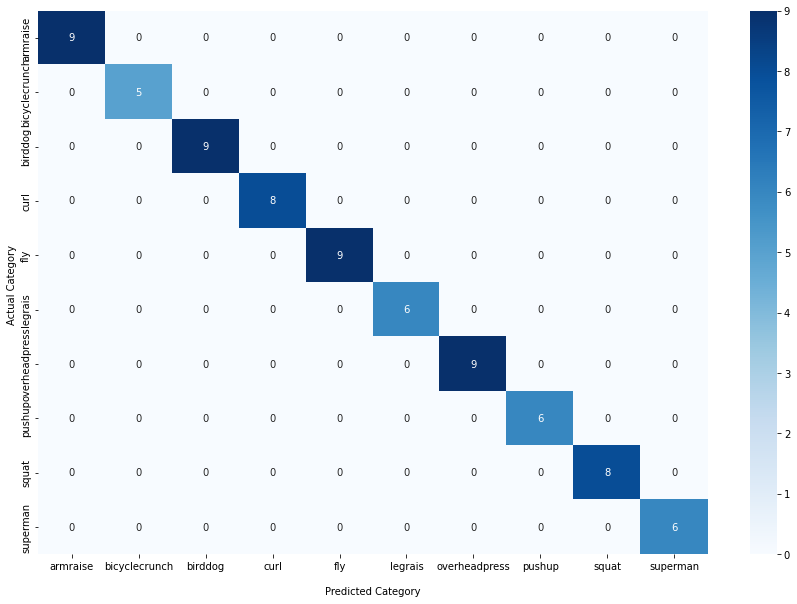

['birddog', 'superman', 'fly', 'superman', 'fly', 'pushup', 'overheadpress', 'armraise', 'birddog', 'overheadpress', 'birddog', 'squat', 'birddog', 'armraise', 'legraise', 'overheadpress', 'armraise', 'curl', 'curl', 'fly', 'armraise', 'birddog', 'legraise', 'armraise', 'pushup', 'legraise', 'legraise', 'fly', 'overheadpress', 'overheadpress', 'pushup', 'squat', 'bicyclecrunch', 'fly', 'birddog', 'bicyclecrunch', 'armraise', 'fly', 'pushup', 'squat', 'superman', 'fly', 'pushup', 'squat', 'bicyclecrunch', 'birddog', 'superman', 'curl', 'fly', 'superman', 'superman', 'curl', 'overheadpress', 'armraise', 'bicyclecrunch', 'overheadpress', 'overheadpress', 'pushup', 'fly', 'squat', 'curl', 'bicyclecrunch', 'curl', 'curl', 'legraise', 'squat', 'squat', 'birddog', 'curl', 'squat', 'armraise', 'overheadpress', 'birddog', 'legraise', 'armraise']


In [ ]:
prediction = predict_knn(X_train,y_train, X_test, 3)
print(balanced_accuracy_score(y_test, prediction))
cf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(15,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

      ## Display the visualization of the Confusion Matrix.
plt.show()
print(prediction)

In [ ]:
# ['overheadpress', 'overheadpress', 'pushup', 'curl', 'pushup', 'birddog', 'squat', 'squat', 'pushup', 'superman', 'superman', 'bicyclecrunch', 'fly', 'birddog', 'birddog', 'armraise', 'fly', 'curl', 'overheadpress', 'birddog', 'legraise', 'squat', 'armraise', 'pushup', 'squat', 'squat', 'curl', 'birddog', 'superman', 'armraise', 'squat', 'overheadpress', 'curl', 'armraise', 'superman', 'pushup', 'armraise', 'bicyclecrunch', 'overheadpress', 'curl', 'curl', 'overheadpress', 'legraise', 'curl', 'overheadpress', 'pushup', 'armraise', 'overheadpress', 'armraise', 'squat', 'legraise', 'overheadpress', 'armraise', 'bicyclecrunch', 'pushup', 'pushup', 'armraise', 'bicyclecrunch', 'superman', 'overheadpress', 'armraise', 'legraise', 'pushup', 'armraise', 'pushup', 'squat', 'squat', 'squat', 'pushup', 'squat', 'legraise', 'bicyclecrunch', 'superman', 'armraise', 'legraise', 'curl', 'overheadpress', 'pushup', 'overheadpress', 'bicyclecrunch', 'fly', 'birddog', 'overheadpress', 'squat', 'legraise', 'curl', 'pushup', 'armraise', 'superman', 'legraise', 'superman', 'fly', 'pushup', 'squat', 'fly', 'superman', 'squat', 'curl', 'birddog', 'bicyclecrunch', 'fly', 'superman', 'overheadpress', 'pushup', 'overheadpress', 'birddog', 'birddog', 'overheadpress', 'fly', 'overheadpress', 'armraise', 'fly', 'pushup', 'superman', 'armraise', 'bicyclecrunch', 'armraise', 'pushup', 'superman', 'armraise', 'curl', 'legraise', 'birddog', 'fly', 'pushup', 'squat', 'curl', 'superman', 'curl', 'bicyclecrunch', 'bicyclecrunch', 'superman', 'pushup', 'overheadpress', 'superman', 'overheadpress', 'superman', 'armraise', 'overheadpress', 'squat', 'superman', 'pushup', 'squat', 'legraise', 'bicyclecrunch', 'superman', 'fly', 'pushup', 'overheadpress', 'superman', 'fly', 'legraise', 'curl', 'armraise', 'superman', 'superman', 'bicyclecrunch', 'curl', 'bicyclecrunch', 'overheadpress', 'pushup', 'legraise', 'legraise', 'overheadpress', 'armraise', 'birddog', 'birddog', 'pushup', 'bicyclecrunch', 'armraise', 'bicyclecrunch', 'birddog', 'bicyclecrunch', 'squat', 'squat', 'armraise', 'superman', 'superman', 'pushup', 'superman', 'squat', 'birddog', 'pushup', 'curl', 'birddog', 'bicyclecrunch', 'fly', 'bicyclecrunch', 'bicyclecrunch', 'pushup', 'pushup', 'legraise', 'birddog', 'fly', 'superman', 'superman', 'curl', 'overheadpress', 'overheadpress', 'curl', 'armraise', 'squat', 'bicyclecrunch', 'curl', 'birddog', 'birddog', 'armraise', 'overheadpress', 'bicyclecrunch', 'bicyclecrunch', 'overheadpress', 'pushup', 'overheadpress', 'fly', 'pushup', 'curl', 'overheadpress', 'birddog', 'armraise', 'fly', 'fly', 'armraise', 'squat', 'curl', 'pushup', 'bicyclecrunch', 'bicyclecrunch', 'armraise', 'fly', 'curl', 'superman', 'legraise', 'curl', 'bicyclecrunch', 'armraise', 'legraise', 'bicyclecrunch', 'armraise', 'armraise', 'fly', 'overheadpress', 'bicyclecrunch', 'pushup', 'overheadpress', 'armraise', 'fly', 'curl', 'overheadpress', 'superman', 'squat', 'pushup', 'armraise', 'superman', 'fly', 'fly', 'squat', 'bicyclecrunch', 'curl', 'fly', 'fly', 'overheadpress', 'armraise', 'superman', 'squat', 'fly', 'curl', 'overheadpress', 'armraise', 'birddog', 'squat', 'bicyclecrunch', 'fly', 'legraise', 'squat', 'squat', 'birddog', 'curl', 'bicyclecrunch', 'squat', 'superman', 'squat', 'pushup', 'overheadpress', 'overheadpress', 'overheadpress', 'curl', 'fly', 'bicyclecrunch', 'squat', 'armraise', 'superman', 'pushup', 'pushup', 'overheadpress', 'superman', 'pushup', 'curl', 'overheadpress', 'birddog', 'fly', 'legraise', 'squat', 'squat', 'armraise', 'superman', 'birddog', 'fly', 'fly', 'superman', 'birddog', 'legraise', 'bicyclecrunch', 'pushup', 'overheadpress', 'superman', 'armraise', 'armraise', 'curl', 'armraise', 'squat', 'fly', 'overheadpress', 'overheadpress', 'superman', 'bicyclecrunch', 'overheadpress', 'birddog', 'legraise', 'curl', 'birddog', 'pushup', 'armraise', 'birddog', 'pushup', 'squat', 'bicyclecrunch', 'bicyclecrunch', 'curl', 'bicyclecrunch', 'squat', 'fly', 'fly', 'superman', 'curl', 'squat', 'superman', 'armraise', 'superman', 'birddog', 'fly', 'curl', 'pushup', 'bicyclecrunch', 'overheadpress', 'birddog', 'legraise', 'bicyclecrunch', 'fly', 'overheadpress', 'pushup', 'bicyclecrunch', 'pushup', 'curl', 'bicyclecrunch', 'pushup', 'pushup', 'pushup', 'overheadpress', 'bicyclecrunch', 'superman', 'superman', 'armraise', 'legraise', 'legraise', 'squat', 'fly', 'armraise', 'legraise', 'birddog', 'bicyclecrunch', 'squat', 'bicyclecrunch', 'overheadpress', 'armraise', 'pushup', 'bicyclecrunch', 'birddog', 'superman', 'fly', 'superman', 'squat', 'curl', 'bicyclecrunch', 'squat', 'armraise', 'legraise', 'fly', 'overheadpress', 'bicyclecrunch', 'overheadpress', 'legraise', 'armraise', 'overheadpress', 'legraise', 'pushup', 'armraise', 'squat', 'overheadpress', 'overheadpress', 'legraise', 'birddog', 'curl', 'armraise', 'legraise', 'pushup', 'squat', 'overheadpress', 'armraise', 'superman', 'legraise', 'armraise', 'birddog', 'pushup', 'squat', 'legraise', 'legraise', 'legraise', 'birddog', 'pushup', 'superman', 'superman', 'bicyclecrunch', 'legraise', 'armraise', 'overheadpress', 'fly', 'bicyclecrunch', 'fly', 'bicyclecrunch', 'birddog', 'superman', 'legraise', 'fly', 'legraise', 'legraise', 'superman', 'fly', 'overheadpress', 'squat', 'fly', 'birddog', 'pushup', 'pushup', 'curl', 'curl', 'curl', 'fly', 'armraise', 'superman', 'armraise', 'fly', 'bicyclecrunch', 'superman', 'pushup', 'superman', 'armraise', 'superman', 'fly', 'legraise', 'bicyclecrunch', 'legraise', 'armraise', 'squat', 'overheadpress', 'pushup', 'superman', 'legraise', 'overheadpress', 'fly', 'curl', 'pushup', 'pushup', 'overheadpress', 'pushup', 'birddog', 'pushup', 'squat', 'legraise', 'legraise', 'curl', 'overheadpress', 'fly', 'fly', 'squat', 'curl', 'squat', 'pushup']
y_test

1.0


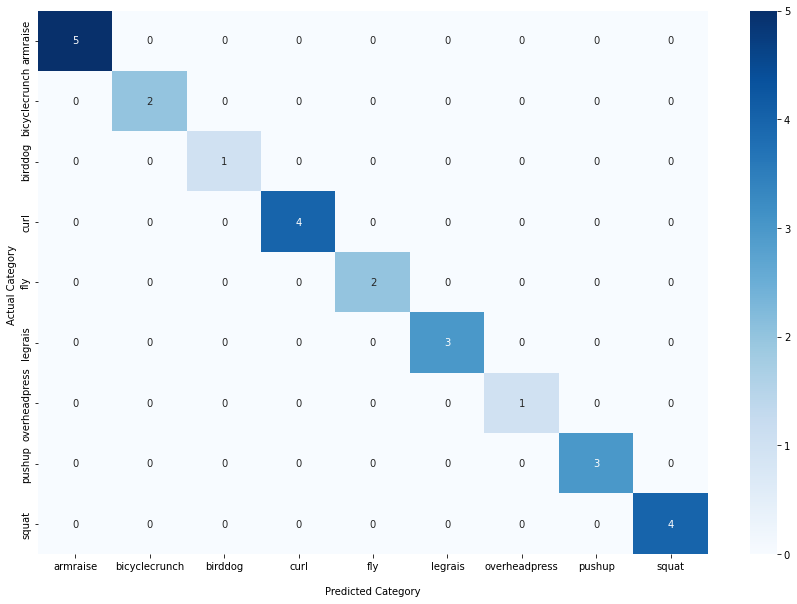